11.5 Standard form LP barrier method

In [1]:
import numpy as np
from LPsolver import *

number of Newton steps: 8


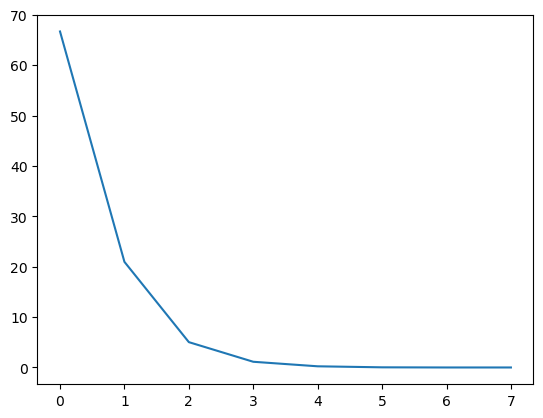

8.526512829121202e-13 0.0028809483380674017
159.09046244548995
0.00020204257505646028


In [2]:
# random problem data
np.random.seed(364)
m = 100
n= 500
A = np.vstack((np.random.randn(m-1, n), np.ones((1, n))))
x0 = np.random.rand(n) + 0.1
b = A @ x0
c = np.random.randn(n)
# solutions from our LP solver
problem = NewtonSolver(A, b, c, x0)
x_opt, dual_opt = problem.solve()
print('number of Newton steps:', problem.steps)
from matplotlib import pyplot as plt 
# verify asymptotic quadratic convergence
plt.plot(problem.Newton_decrement_history)
plt.show()
# check KKT conditions
print(np.max(np.abs(A @ x_opt - b)), np.max(np.abs(A.T @ dual_opt + problem.gradient())))
import cvxpy as cp 
x = cp.Variable(n, nonneg=True)
objective = cp.Minimize(c @ x - cp.sum(cp.log(x)))
constraints = [A @ x == b]
prob = cp.Problem(objective, constraints)
prob.solve()
print(objective.value)
# compare our result with CVXPY result
print(np.max(np.abs(x_opt - x.value)))

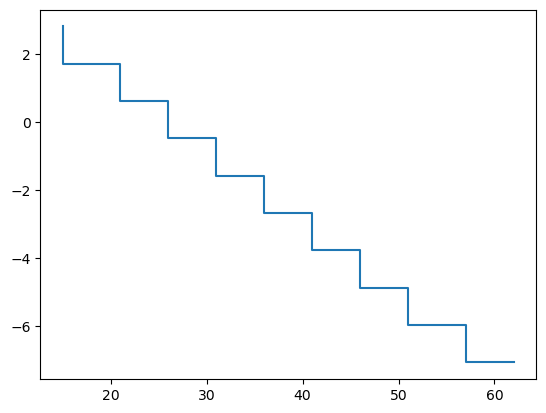

In [3]:
problem = LPsolver_startpoint(A, b, c, x0)
ans = problem.barrier()
plt.step(np.cumsum(problem.history[0]), np.log(problem.history[1]))
plt.show()

In [4]:
# interior point method
problem = LPsolver(A, b, c)
result = problem.solve()
# cvx 
x = cp.Variable(n, nonneg=True)
objective = cp.Minimize(c @ x)
constraints = [A @ x == b]
prob = cp.Problem(objective, constraints)
prob.solve()
print('LP with strictly feasible starting point result', c @ ans)
print('LP solver result', c @ result)
print('cvx result', c @ x.value)

LP with strictly feasible starting point result -415.8171701196035
LP solver result -415.81717015174223
cvx result -415.817847061169
